<a href="https://colab.research.google.com/github/honlai/Financial_Mathematics_I/blob/main/Exercises3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Execute simulations for (fractional) Kelly betting/trading



In [15]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
W=0.7
L=1-W
NBets=100
stack=50
payout_odds=1.6

In [16]:
#get every bet is win or loss
def give_ratio():
  rdn=np.random.binomial(1,W,size=NBets-1)
  #Win: to_bet_from_stack*payout_odds Loss: to_bet_from_stack=0
  ratio=np.where(rdn>0,payout_odds+1,0)
  #print(ratio)
  return ratio

###What Is the Kelly Criterion?
The Kelly Criterion is a formula used to determine the optimal size of a bet when the expected returns are known. According to the formula, the optimal bet is determined by the formula
####The Kelly percentage:
$$K\%=W-\frac{1-W}{po}$$
where
$W=$ Winning probability , $po=$ payout odds

In [17]:
#get Kp
def get_Kp(Wr=W,po=payout_odds):
  Kp=Wr-((1-Wr)/po)
  return Kp

In [18]:
#get the stacks after bet
def get_stacks(p_to_bet=0,ratio=np.ones(NBets)):
  st=np.zeros(NBets)
  st[0]=stack
  for bets in range(NBets-1):
    st[bets+1]=np.round(st[bets]*(1-p_to_bet))+np.round(np.round(st[bets]*p_to_bet)*ratio[bets])
    #print(st[bets+1])
  return st

In [19]:
#make a graph with different percantage of stack to bet
def graph():
  r=give_ratio()
  #every time bets Kp of stack
  st_Kp=get_stacks(get_Kp(),r)
  #20% of stack
  st_20=get_stacks(0.2,r)
  #40% of stack
  st_40=get_stacks(0.4,r)
  #60% of stack
  st_60=get_stacks(0.6,r)
  #80% of stack
  st_80=get_stacks(0.8,r)

  #make graph
  data = {'Kp': np.log(st_Kp),'20': np.log(st_20),'40': np.log(st_40),'60': np.log(st_60),'80': np.log(st_80)}
  df = pd.DataFrame(data)
  df.plot()
  plt.xlabel('Bets')
  plt.ylabel('Stack')
  return

<ipython-input-19-3bbe11b257f8>:16: RuntimeWarning: divide by zero encountered in log
  data = {'Kp': np.log(st_Kp),'20': np.log(st_20),'40': np.log(st_40),'60': np.log(st_60),'80': np.log(st_80)}
<ipython-input-19-3bbe11b257f8>:16: RuntimeWarning: divide by zero encountered in log
  data = {'Kp': np.log(st_Kp),'20': np.log(st_20),'40': np.log(st_40),'60': np.log(st_60),'80': np.log(st_80)}


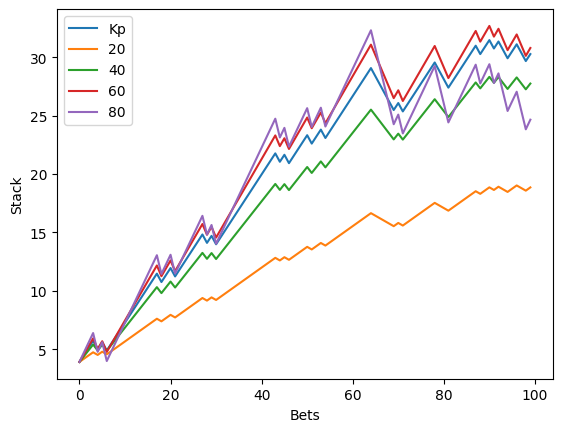

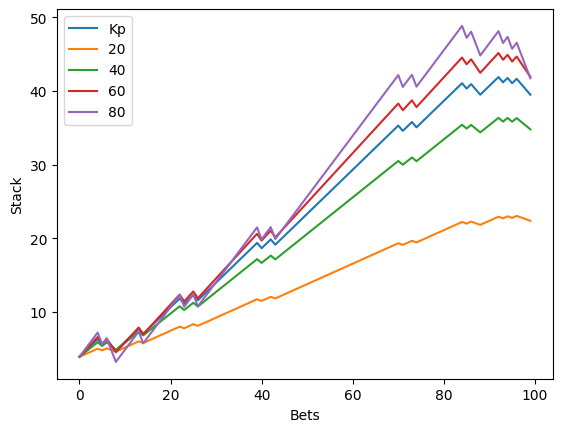

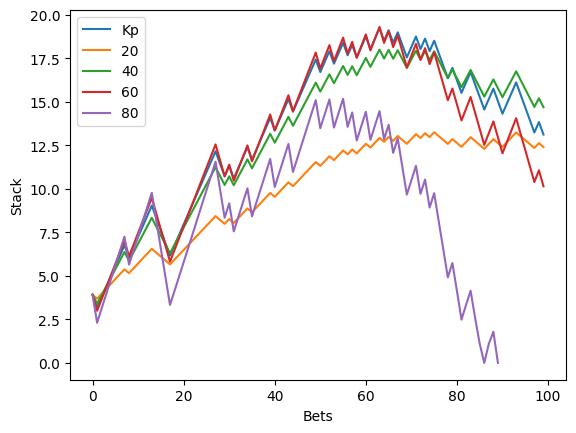

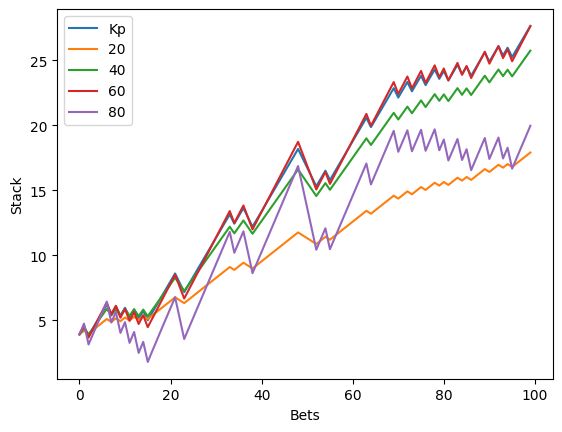

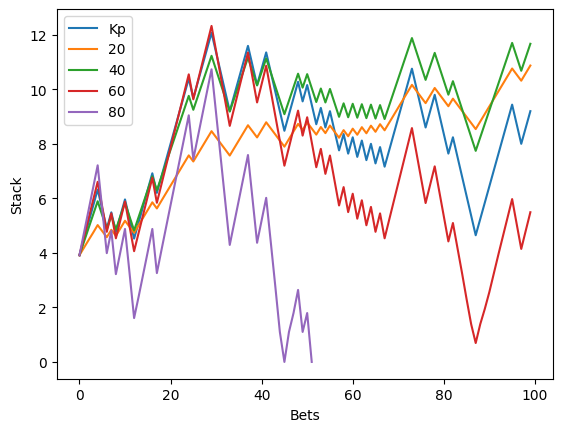

In [20]:
for i in range(5):
  graph()

<ipython-input-21-adc59ffda8f6>:8: RuntimeWarning: divide by zero encountered in log
  data.update({str(i): np.log(st_Kp)})


            0          1          2          3          4          5  \
0    3.912023   3.912023   3.912023   3.912023   3.912023   3.912023   
1    3.178054   4.521789   4.521789   4.521789   4.521789   4.521789   
2    3.761200   3.806662   3.806662   5.117994   5.117994   3.806662   
3    4.356709   4.406719   4.406719   5.720312   5.720312   4.406719   
4    4.955827   5.003946   5.003946   6.318968   6.318968   5.003946   
..        ...        ...        ...        ...        ...        ...   
95  29.137984  30.529471  22.615864  25.244803  26.556334  19.988101   
96  29.736821  31.128307  21.897399  25.843640  27.155171  20.586937   
97  29.018356  30.409842  22.496236  25.125175  27.754007  21.185774   
98  29.617192  31.008679  23.095072  24.406710  28.352844  21.784610   
99  30.216029  31.607515  22.376607  23.688245  27.634379  22.383447   

            6          7          8          9  ...         40         41  \
0    3.912023   3.912023   3.912023   3.912023  ...   3.91

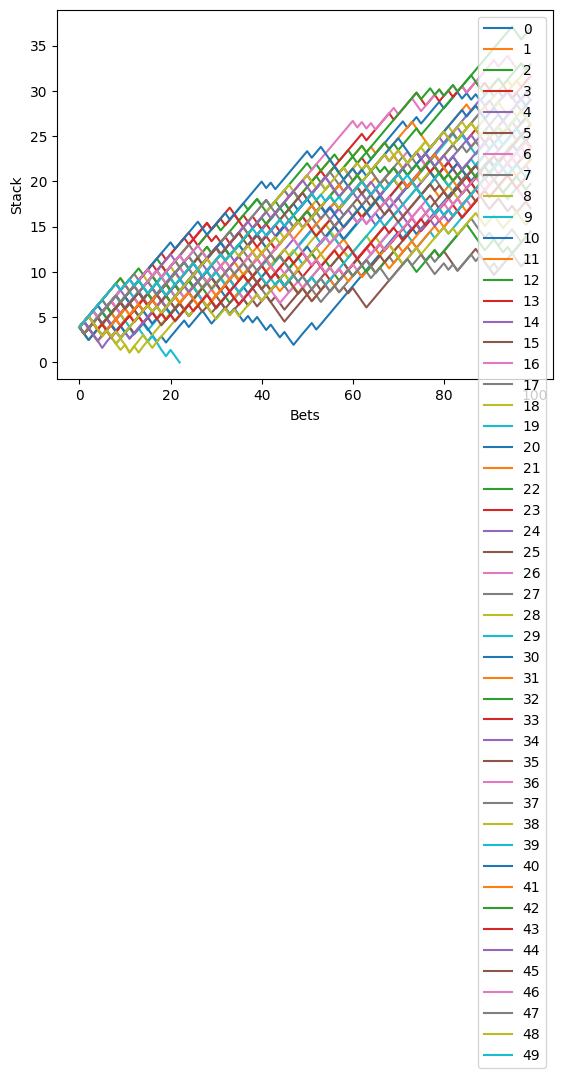

In [21]:
#test use Kelly Criterion for Nmax times
def graph_Kp(Nmax=50):
  data = {}
  for i in range(Nmax):
    #Every time is different
    r=give_ratio()
    st_Kp=get_stacks(get_Kp(),r)
    data.update({str(i): np.log(st_Kp)})
  df = pd.DataFrame(data)
  df.plot()
  plt.xlabel('Bets')
  plt.ylabel('Stack')
  print(df)
  return
graph_Kp()